## Observations and Insights 

Observations and Insights
1. The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice.
2. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
3. The regression analysis helped us to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
4. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [11]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [12]:
# Checking the number of mice.
mouse_count = len(mouse_metadata["Mouse ID"])
mouse_count

249

In [13]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 

duplicate_mice = mouse_data.loc[mouse_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id


,0
0,g989


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data[mouse_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

data_grouped = clean_df.groupby(["Drug Regimen"])
volume_mean = data_grouped.mean()["Tumor Volume (mm3)"]
volume_median = data_grouped.median()["Tumor Volume (mm3)"]
volume_variance = data_grouped.var()["Tumor Volume (mm3)"]
volume_stddev = data_grouped.std()["Tumor Volume (mm3)"]
volume_sem = data_grouped.sem()["Tumor Volume (mm3)"]
summary_df=pd.DataFrame({"Mean":volume_mean,"Median":volume_median,"Variance":volume_variance,
                         "Standard Deviation":volume_stddev,"SEM":volume_sem})
summary_df=summary_df.style.set_caption("Tumor Volume (mm3)")
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

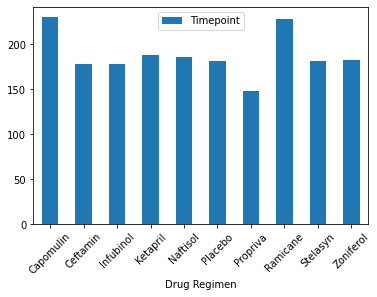

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_by_drug = clean_df.groupby("Drug Regimen")
data_time_counted = data_by_drug.count()
data_time_counted.plot.bar(y="Timepoint", rot=45)


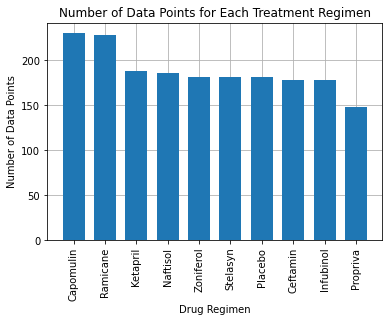

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
plt.grid(zorder=0)

# Display resulting plot
plt.show()


Text(0, 0.5, '')

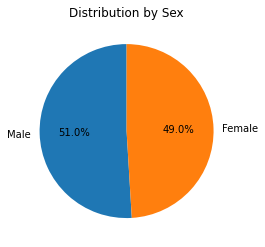

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = clean_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')

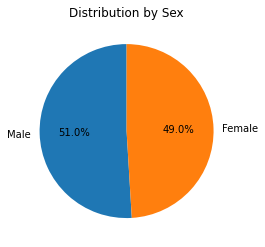

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_times = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = clean_df.merge(last_times,how="left", on="Mouse ID")
merged_data=merged_data.loc[merged_data["Timepoint_x"] == merged_data["Timepoint_y"]]
print(merged_data.iloc[1,6])
merged_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


23.34359787


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [51]:
# Put treatments into a list for a for loop (and later for plot labels)

four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
last_tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in four_drugs:
    tumor_vol_drug = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for i in np.arange(0,len(merged_data["Mouse ID"])):
        if merged_data.iloc[i,1] == drug:
            #print("got here")
            tumor_vol = merged_data.iloc[i,6]
            tumor_vol_drug.append(tumor_vol)
    # add subset 
    last_tumor_vol.append(tumor_vol_drug)
last_tumor_vol[0]


[23.34359787,
 28.48403281,
 28.43096411,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 37.31184577,
 36.04104736,
 37.07402422,
 38.84687569,
 38.93963263,
 38.98287774,
 38.75326548,
 38.125164399999996,
 39.95234669,
 40.65812366,
 40.1592203,
 40.72857787,
 41.48300765,
 41.58152074,
 47.68596303,
 46.53920617]

In [52]:
# Determine outliers using upper and lower bounds
last_tumor_cap_df = pd.DataFrame({"Last Tumor Voume (Capomulin)(mm3)":last_tumor_vol[0]})
quartiles_cap = last_tumor_cap_df.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap.loc[0.25]
upperq_cap = quartiles_cap.loc[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
volumes_cap = list(last_tumor_cap_df["Last Tumor Voume (Capomulin)(mm3)"])
volumes_cap.sort()
volumes_cap #all Capomulin datapoints are within bounds

Values below Last Tumor Voume (Capomulin)(mm3)    20.704562
dtype: float64 could be outliers.
Values above Last Tumor Voume (Capomulin)(mm3)    51.832015
dtype: float64 could be outliers.


[23.34359787,
 28.43096411,
 28.48403281,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 36.04104736,
 37.07402422,
 37.31184577,
 38.125164399999996,
 38.75326548,
 38.84687569,
 38.93963263,
 38.98287774,
 39.95234669,
 40.1592203,
 40.65812366,
 40.72857787,
 41.48300765,
 41.58152074,
 46.53920617,
 47.68596303]

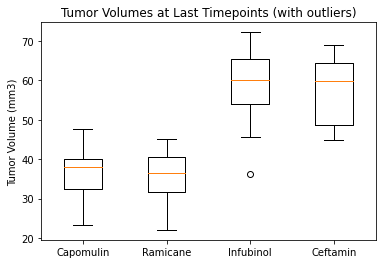

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes at Last Timepoints (with outliers)')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(last_tumor_vol)
plt.xticks([1,2,3,4],four_drugs)
plt.show()

## Line and Scatter Plots

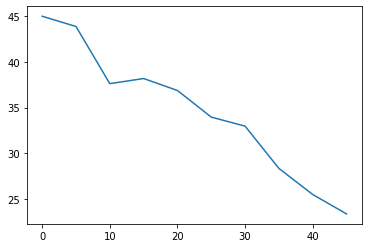

In [57]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
mouse_s185 = clean_df.loc[clean_df["Mouse ID"] == "s185"]
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])

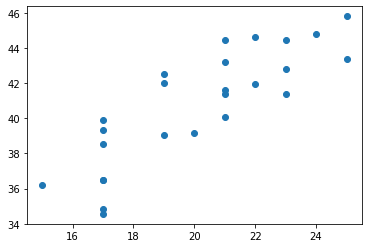

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_regimen = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol_by_mouse = capo_regimen.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()

avg_tumor_vol_by_mouse_df = pd.DataFrame(avg_tumor_vol_by_mouse)
avg_tumor_vol_by_mouse_df = avg_tumor_vol_by_mouse_df.reset_index()
avg_tumor_vol_by_mouse_df

x_axis = avg_tumor_vol_by_mouse_df["Weight (g)"]
data = avg_tumor_vol_by_mouse_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, data) 
            
            #marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)

## Correlation and Regression

The correlation between both factors is 0.84


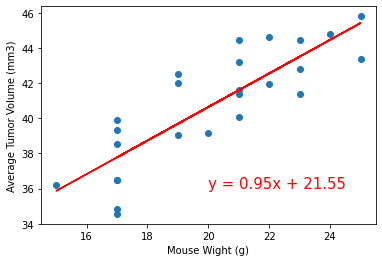

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol_by_mouse_df["Weight (g)"],avg_tumor_vol_by_mouse_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = avg_tumor_vol_by_mouse_df["Weight (g)"]
y_values = avg_tumor_vol_by_mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,36),fontsize=15,color="red") 
plt.xlabel('Mouse Wight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
